In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
import matplotlib.animation as ani
import plotly
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


C:\Users\Ankita\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ankita\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Ankita\anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  stacklevel=1)
In C:\Users\Ankita\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ankita\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ankita\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and 

# Load the Data

In [2]:
#Importing Dataset
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df_raw = pd.read_csv(url)

In [3]:
print("Shape of Data Frame is ------>",df_raw.shape)

Shape of Data Frame is ------> (115893, 62)


# Data Pre-processing

In [4]:
#Remove Duplicated Rows
df_raw = df_raw.drop_duplicates()

In [5]:
#Remove Rows where country name is missing
df_raw = df_raw[df_raw.location != '']

In [6]:
#Remove Rows where there are irrelavant country names
df_raw = df_raw[df_raw.location != 'Asia']
df_raw = df_raw[df_raw.location != 'World']
df_raw = df_raw[df_raw.location != 'North America']
df_raw = df_raw[df_raw.location != 'South America']
df_raw = df_raw[df_raw.location != 'European Union']
df_raw = df_raw[df_raw.location != 'Europe']
df_raw = df_raw[df_raw.location != 'Africa']
print("Shape of Data Frame is ------>",df_raw.shape)

Shape of Data Frame is ------> (111762, 62)


In [8]:
#Display which countries are present in dataset
total_number_of_countries = df_raw['location'].nunique()
print(total_number_of_countries)
total_countries_name = df_raw['location'].unique()
print('Name of the countries present in the dataset are: ')
print(total_countries_name)

226
Name of the countries present in the dataset are: 
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Faeroe Islands' 'Falkland Islands' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germ

In [9]:
#Checking for null values
df_raw.isnull()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,False,False,False,False,False,False,True,True,True,True,...,True,False,False,True,True,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,True,False,False,True,True,False,False,False,False,True
2,False,False,False,False,False,False,True,True,True,True,...,True,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,True,False,False,True,True,False,False,False,False,True
4,False,False,False,False,False,False,True,True,True,True,...,True,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
115889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
115890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
115891,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
df_raw.isna().any()

iso_code                      False
continent                      True
location                      False
date                          False
total_cases                    True
                              ...  
handwashing_facilities         True
hospital_beds_per_thousand     True
life_expectancy                True
human_development_index        True
excess_mortality               True
Length: 62, dtype: bool

In [11]:
print(df_raw.isnull().sum())

iso_code                           0
continent                       1177
location                           0
date                               0
total_cases                     5622
                               ...  
handwashing_facilities         60719
hospital_beds_per_thousand     18861
life_expectancy                 2428
human_development_index         9465
excess_mortality              107759
Length: 62, dtype: int64


# Feature Selection

In [12]:
df_raw_corr = df_raw.corr()
df_raw_corr

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
total_cases,1.000000,0.648092,0.673515,0.929591,0.603065,0.644566,0.255596,0.104140,0.123875,0.277446,...,-0.085832,-0.089201,0.037851,0.077050,-0.067633,6.139290e-02,-0.001978,0.088526,0.118706,0.041016
new_cases,0.648092,1.000000,0.969763,0.595179,0.796983,0.784106,0.137635,0.206925,0.203921,0.150122,...,-0.077351,-0.077612,0.033093,0.057633,-0.054435,5.518585e-02,-0.006011,0.077751,0.102221,0.142799
new_cases_smoothed,0.673515,0.969763,1.000000,0.616911,0.797486,0.826244,0.143206,0.178438,0.210244,0.156728,...,-0.079271,-0.079831,0.034056,0.059309,-0.056320,5.514886e-02,-0.006313,0.079878,0.104969,0.128799
total_deaths,0.929591,0.595179,0.616911,1.000000,0.642590,0.686187,0.258341,0.099009,0.116611,0.408493,...,-0.122256,-0.128418,0.044801,0.087392,-0.081943,1.205978e-01,-0.007409,0.114366,0.144333,0.154679
new_deaths,0.603065,0.796983,0.797486,0.642590,1.000000,0.943833,0.119256,0.158996,0.169804,0.215847,...,-0.107914,-0.092503,0.041777,0.057246,-0.051014,9.849145e-02,-0.009603,0.087711,0.112927,0.418981
new_deaths_smoothed,0.644566,0.784106,0.826244,0.686187,0.943833,1.000000,0.138382,0.148771,0.181066,0.232899,...,-0.112259,-0.101318,0.027744,0.061975,-0.059148,9.766138e-02,-0.007972,0.092966,0.120195,0.345949
total_cases_per_million,0.255596,0.137635,0.143206,0.258341,0.119256,0.138382,1.000000,0.440813,0.528939,0.775873,...,-0.315132,-0.177835,0.034213,0.364547,0.059571,3.715986e-01,0.187223,0.363531,0.386358,0.095344
new_cases_per_million,0.104140,0.206925,0.178438,0.099009,0.158996,0.148771,0.440813,1.000000,0.849784,0.294921,...,-0.241550,-0.116977,0.034432,0.244909,0.070117,2.691046e-01,0.133784,0.245257,0.273776,0.296270
new_cases_smoothed_per_million,0.123875,0.203921,0.210244,0.116611,0.169804,0.181066,0.528939,0.849784,1.000000,0.349401,...,-0.272015,-0.135388,0.039112,0.279026,0.079015,3.035651e-01,0.154642,0.288451,0.315655,0.305722
total_deaths_per_million,0.277446,0.150122,0.156728,0.408493,0.215847,0.232899,0.775873,0.294921,0.349401,1.000000,...,-0.301652,-0.173080,-0.021096,0.374923,0.042902,3.416568e-01,0.167000,0.331963,0.344908,0.318336


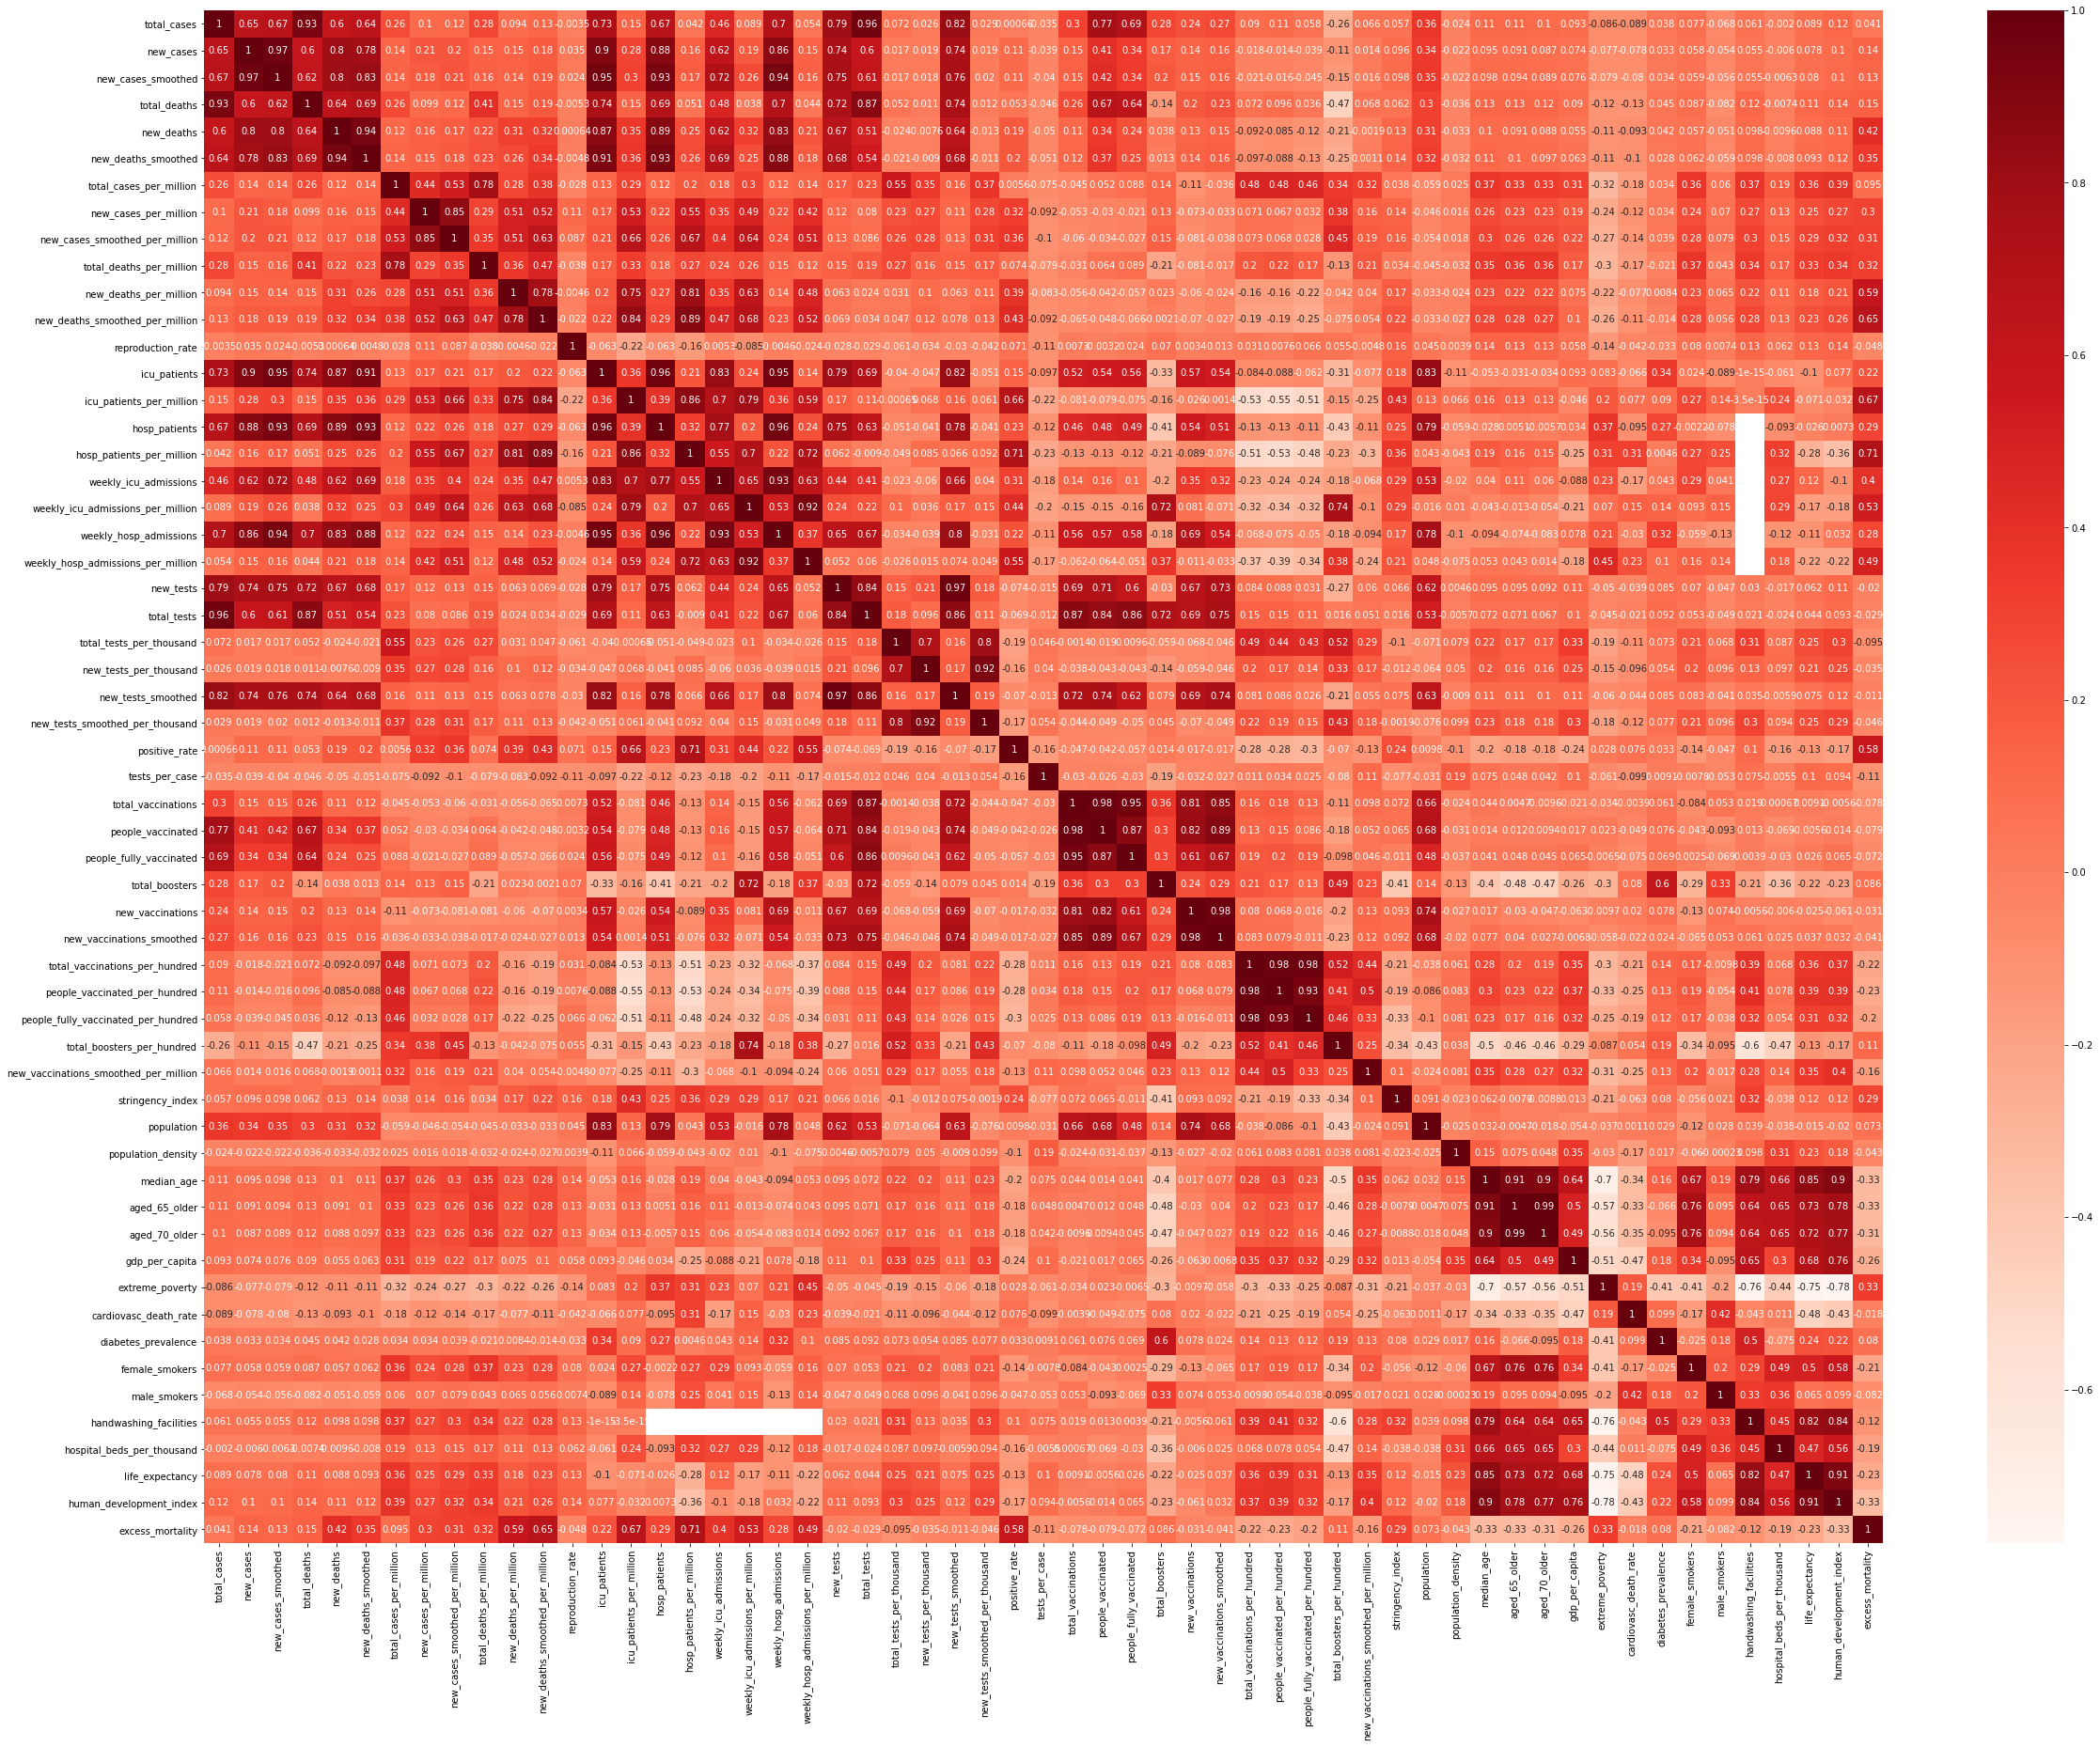

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(40,30))
cor = df_raw.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor["total_deaths"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

total_cases                0.929591
new_cases                  0.595179
new_cases_smoothed         0.616911
total_deaths               1.000000
new_deaths                 0.642590
new_deaths_smoothed        0.686187
icu_patients               0.737896
hosp_patients              0.693680
weekly_hosp_admissions     0.698846
new_tests                  0.723849
total_tests                0.872112
new_tests_smoothed         0.744271
people_vaccinated          0.672828
people_fully_vaccinated    0.637980
Name: total_deaths, dtype: float64

In [15]:
#selecting the features which are relevant to death cases and vaccination rate
df_raw1 =df_raw[['total_cases', 'new_cases', 'new_deaths', 'total_deaths', 'new_tests','new_cases_smoothed', 'new_deaths_smoothed', 'new_tests_smoothed', 'total_tests', 
                       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations_smoothed', 'population']]
df_raw1

,total_cases,new_cases,new_deaths,total_deaths,new_tests,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed,population
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115888,125671.0,121.0,11.0,4493.0,NaN,155.714,11.000,NaN,NaN,NaN,NaN,NaN,41445.0,15092171.0
115889,125796.0,125.0,10.0,4503.0,NaN,146.143,12.000,NaN,NaN,4493943.0,2750381.0,1743562.0,39160.0,15092171.0
115890,125931.0,135.0,14.0,4517.0,NaN,138.714,11.286,NaN,NaN,4553076.0,2781803.0,1771273.0,40378.0,15092171.0
115891,126056.0,125.0,4.0,4521.0,NaN,134.000,10.286,NaN,NaN,4602020.0,2804924.0,1797096.0,39755.0,15092171.0


In [16]:
df_raw2=df_raw1.copy()
df_raw2=df_raw2.dropna()
df_raw2


,total_cases,new_cases,new_deaths,total_deaths,new_tests,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed,population
1484,79934.0,942.0,5.0,1398.0,3856.0,891.857,9.429,3570.0,349925.0,550.0,549.0,1.0,0.0,2872934.0
1491,87528.0,1239.0,16.0,1488.0,4562.0,1084.857,12.857,3526.0,374604.0,1127.0,689.0,438.0,82.0,2872934.0
1499,95726.0,1075.0,18.0,1600.0,3901.0,1007.857,13.857,3385.0,402383.0,1701.0,1090.0,611.0,72.0,2872934.0
1500,96838.0,1112.0,17.0,1617.0,3935.0,1008.857,14.286,3363.0,406318.0,3049.0,2438.0,611.0,254.0,2872934.0
1504,101285.0,1039.0,15.0,1681.0,3258.0,1062.143,16.286,3550.0,421412.0,6728.0,6073.0,655.0,739.0,2872934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115879,124367.0,131.0,16.0,4390.0,2421.0,268.571,22.000,4652.0,1125122.0,4110354.0,2513053.0,1597301.0,51016.0,15092171.0
115880,124437.0,70.0,11.0,4401.0,1969.0,255.000,21.714,4593.0,1127091.0,4137853.0,2530181.0,1607672.0,52093.0,15092171.0
115881,124581.0,144.0,15.0,4416.0,5569.0,225.714,17.571,4686.0,1132660.0,4172657.0,2552273.0,1620384.0,49092.0,15092171.0
115882,124773.0,192.0,3.0,4419.0,5423.0,207.571,14.143,4434.0,1138083.0,4219824.0,2582405.0,1637419.0,47200.0,15092171.0


In [17]:
df_raw2.corr()

,total_cases,new_cases,new_deaths,total_deaths,new_tests,new_cases_smoothed,new_deaths_smoothed,new_tests_smoothed,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed,population
total_cases,1.000000,0.604362,0.588962,0.931745,0.809923,0.625598,0.625875,0.837652,0.960852,0.877289,0.845607,0.860998,0.766010,0.694673
new_cases,0.604362,1.000000,0.796419,0.515393,0.668739,0.970887,0.776889,0.668149,0.579423,0.452920,0.456072,0.400762,0.479906,0.621043
new_deaths,0.588962,0.796419,1.000000,0.574711,0.639477,0.814716,0.945798,0.638020,0.512067,0.374824,0.395879,0.293549,0.462889,0.564481
total_deaths,0.931745,0.515393,0.574711,1.000000,0.709381,0.532094,0.611365,0.733968,0.877878,0.791452,0.745617,0.821488,0.666228,0.571465
new_tests,0.809923,0.668739,0.639477,0.709381,1.000000,0.682646,0.655780,0.967625,0.860644,0.718039,0.735813,0.603970,0.748350,0.746993
new_cases_smoothed,0.625598,0.970887,0.814716,0.532094,0.682646,1.000000,0.831120,0.696368,0.593514,0.462387,0.468086,0.403587,0.492217,0.635253
new_deaths_smoothed,0.625875,0.776889,0.945798,0.611365,0.655780,0.831120,1.000000,0.675311,0.541590,0.398200,0.422941,0.306596,0.497022,0.595270
new_tests_smoothed,0.837652,0.668149,0.638020,0.733968,0.967625,0.696368,0.675311,1.000000,0.888945,0.744372,0.763159,0.625332,0.775232,0.767923
total_tests,0.960852,0.579423,0.512067,0.877878,0.860644,0.593514,0.541590,0.888945,1.000000,0.882400,0.850090,0.863760,0.757141,0.701784
total_vaccinations,0.877289,0.452920,0.374824,0.791452,0.718039,0.462387,0.398200,0.744372,0.882400,1.000000,0.985975,0.930546,0.831892,0.687903


In [18]:
# Selecting features based on correlation
# Generating the correlation matrix

corr = df_raw2.corr()

<AxesSubplot:>

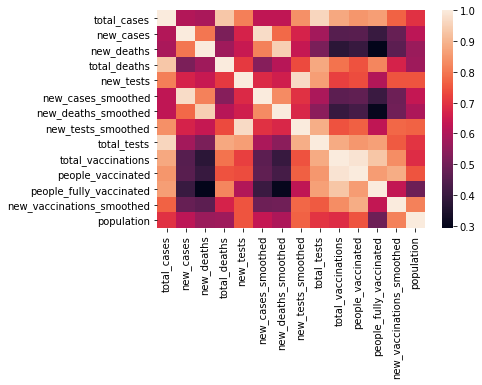

In [19]:
# Generating the correlation heat-map
sns.heatmap(corr)

# Going through each country situation related to deaths and confirmed cases

In [20]:
_maxdate = max(df_raw['date'])
# Going through each country situation related to deaths and confirmed cases 
_groupby_Country = df_raw.groupby(['location','date']).aggregate({'new_cases':'max','new_deaths':'max','total_deaths':'max','total_cases':'max'})
cases_by_country = _groupby_Country.iloc[_groupby_Country.index.get_level_values('date') == _maxdate]
cases_by_country = cases_by_country.sort_values(by='total_deaths', ascending=False) 
cases_by_country.reset_index(level=['date'], inplace=True)
cases_by_country.style.background_gradient(cmap='Reds')

,date,new_cases,new_deaths,total_deaths,total_cases
location,,,,,
United States,2021-09-10,262076.000000,4409.000000,658992.000000,40863868.000000
Brazil,2021-09-10,15951.000000,672.000000,585846.000000,20974850.000000
India,2021-09-10,33376.000000,308.000000,442317.000000,33208330.000000
Mexico,2021-09-10,0.000000,0.000000,266150.000000,3479999.000000
Peru,2021-09-10,813.000000,52.000000,198673.000000,2159306.000000
Russia,2021-09-10,18008.000000,769.000000,187768.000000,7000636.000000
Indonesia,2021-09-10,5376.000000,315.000000,138431.000000,4158731.000000
United Kingdom,2021-09-10,37012.000000,147.000000,134313.000000,7202212.000000
Italy,2021-09-10,5617.000000,62.000000,129828.000000,4596558.000000


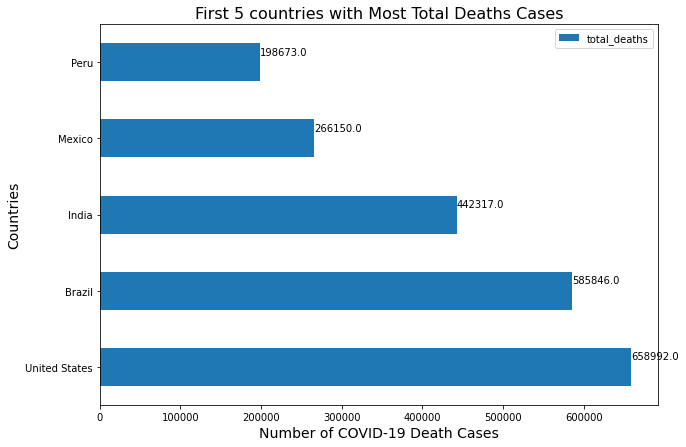

In [21]:
# first 5 countries with most confirmed death cases
reset_cases_by_country = cases_by_country.reset_index(level=0)
ax = reset_cases_by_country.head(5).plot(figsize=(10,7),x='location', y=['total_deaths'], kind='barh')
plt.ylabel('Countries',fontsize=14)
plt.xlabel('Number of COVID-19 Death Cases', fontsize=14)
plt.title('First 5 countries with Most Total Deaths Cases', fontsize=16)
plt.ticklabel_format(style='plain', axis='x')
# for index, data in enumerate(reset_cases_by_country.head(5)['total_cases']):
#     plt.text(data, index-0.25, str(data), fontsize=10)
for index, data in enumerate(reset_cases_by_country.head(5)['total_deaths']):
    plt.text(data, index+0.1, str(data), fontsize=10)

In [24]:
#Plotting the scatter plot to see the trends of total death cases in different countries
df = df_raw
df_India = df[df.location == 'India']
df_US = df[df.location == 'United States']
df_Mexico = df[df.location == 'Mexico']
df_Peru = df[df.location == 'Peru']
df_Brazil = df[df.location == 'Brazil']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_India['date'], y = df_India['total_deaths'], mode='lines+markers', name='India',line=dict(color='green', width=2)))

fig.add_trace(go.Scatter(x=df_US['date'], y = df_US['total_deaths'], mode='lines+markers', name='United States', line=dict(color='Red', width=2)))

fig.add_trace(go.Scatter(x=df_Mexico['date'], y = df_Mexico['total_deaths'], mode='lines+markers', name='Mexico', line=dict(color='blue', width=2)))

fig.add_trace(go.Scatter(x=df_Peru['date'], y =df_Peru['total_deaths'], mode='lines+markers', name='Peru', line=dict(color='yellow', width=2)))
fig.add_trace(go.Scatter(x=df_Brazil['date'], y =df_Brazil['total_deaths'], mode='lines+markers', name='Brazil', line=dict(color='orange', width=2)))

fig.update_layout(title='Trend of Total Death Cases Among Different Countries', xaxis_tickfont_size=14,yaxis=dict(title='Total Deaths Recorded'))
fig.show()

In [26]:
#Plotting the scatter plot to see the trends of new death cases in United States
df = df_raw
df_US = df[df.location == 'United States']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_US['date'], y = df_US['new_deaths'], mode='lines+markers', name='United States', line=dict(color='Red', width=2)))
fig.update_layout(title='Trend of New Death Cases in United States', xaxis_tickfont_size=14,yaxis=dict(title='New Deaths Recorded'))
fig.show()

In [27]:
#Plotting the scatter plot to see the trends of new death cases in India
df = df_raw
df_India = df[df.location == 'India']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_US['date'], y = df_India['new_deaths'], mode='lines+markers', name='India', line=dict(color='green', width=2)))
fig.update_layout(title='Trend of New Death Cases in India', xaxis_tickfont_size=14,yaxis=dict(title='New Deaths Recorded'))
fig.show()

In [28]:
#Plotting the scatter plot to see the trends of new death cases in Mexico
df = df_raw
df_Mexico= df[df.location == 'Mexico']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Mexico['date'], y = df_Mexico['new_deaths'], mode='lines+markers', name='Mexico', line=dict(color='blue', width=2)))
fig.update_layout(title='Trend of New Death Cases in Mexico', xaxis_tickfont_size=14,yaxis=dict(title='New Deaths Recorded'))
fig.show()

In [29]:
#Plotting the scatter plot to see the trends of new death cases in Brazil
df = df_raw
df_Mexico= df[df.location == 'Brazil']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Mexico['date'], y = df_Brazil['new_deaths'], mode='lines+markers', name='Brazil', line=dict(color='orange', width=2)))
fig.update_layout(title='Trend of New Death Cases in Brazil', xaxis_tickfont_size=14,yaxis=dict(title='New Deaths Recorded'))
fig.show()

In [30]:
#Plotting the scatter plot to see the trends of new death cases in Peru
df = df_raw
df_Peru= df[df.location == 'Peru']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Peru['date'], y = df_Peru['new_deaths'], mode='lines+markers', name='Peru', line=dict(color='yellow', width=2)))
fig.update_layout(title='Trend of New Death Cases in Peru', xaxis_tickfont_size=14,yaxis=dict(title='New Deaths Recorded'))
fig.show()